**為什麼要學習畫圖技巧??**

是因為我們不論是在拿到新的數據、分析過程中或是結果詮釋上，都會需要跟數字打交道。

而我們人對於從數據中找資訊的能力是比較弱的、我們比較擅長從圖裡面找重點。

比如說股票，我們可以快速的從股票走勢圖中了解到股市正在上升、下降，或是不同時期股市的差異。但是如果只單純檢是表格數據，並不容易馬上就看出這些情況。

所以說圖形其實是蘊含很多的資訊量在裡面的!

我們很需要培養將數據繪製成圖的能力、也很需要判讀圖的能力!

# 引入套件

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gdown 

# 下載資料檔
資料來源:https://github.com/fivethirtyeight/data/tree/master/college-majors

In [2]:
url = 'https://drive.google.com/uc?id=1LALbA30NdFeOZxe06iYSUlQEDCPyDDpY'
output = 'recent-grads.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1LALbA30NdFeOZxe06iYSUlQEDCPyDDpY
To: /content/recent-grads.csv
100%|██████████| 26.9k/26.9k [00:00<00:00, 8.66MB/s]


'recent-grads.csv'

---

- Rank：大學科系的收入中位數排名
- Major_code：大學科系的代碼
- Major：大學科系
- Total﹕該系所學生人數
- Men：男性學生數
- Women：女性學生數
- Major_category：大學科系類群
- ShareWomen：女學生占學生數比例
- Sample_size：取樣人數（調查部分學生以推算該科系收入），僅限全職
- Employed：就業人數
- Full_time：全職工作（３５小時或以上）的人數
- Part_time：兼職工作（工時小於３５小時）的人數
- Full_time_year_round：全職工作（３５小時或以上）且已受雇至少５０週的人數
- Unemployed：失業人數
- Unemployment_rate：失業人數比例（失業人數／（就業人數＋失業人數））
- Median：符合Full_time_year_round條件的收入中位數
- P25th：收入的第２５個百分位數
- P75th：收入的第７５個百分位數
- College_jobs：現職工作要求要大學學位的人數
- Non_college_jobs：現職工作無要求大學學位的人數
- Low_wage_jobs：屬於低薪服務工作的人數

---


# pandas_visualization 基本操作
pandas.DataFrame.plot

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

## 讀取資料

In [3]:
df = pd.read_csv("recent-grads.csv")
df

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,5043,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,1848,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,1724,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,3154,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

## 1. 折線圖
使用時機:檢視數值的變化
- 股價隨著時間的變化
- 身高隨著年齡的變化

x軸:數值；y軸:數值

很常會畫上不只一條折線圖
- 不同公司的股價隨著時間的變化

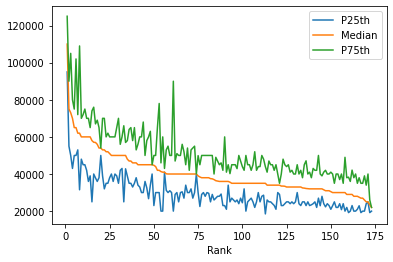

In [ ]:
# 檢視[排名1至173的科系]的[收入]變化

# plot預設是畫折線圖

df.plot(x="Rank", y=["P25th", "Median", "P75th"])
plt.show()

## 2. 散佈圖
使用時機:檢視變項間的關係
- 年資與薪水的關係?
- 焦慮與動機的關係?

x軸:數值；y軸:數值

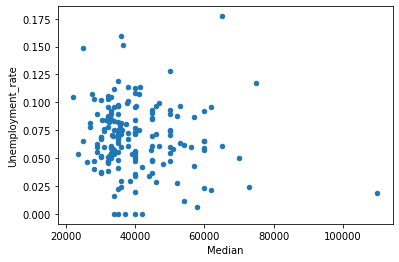

In [ ]:
# 檢視[系所收入中位數]與[失業人數比例]的關係

# 將 plot 裡的 kind 參數設為 scatter 就能畫出散佈圖

df.plot(x="Median", y="Unemployment_rate", kind="scatter")
#df.plot(x="Median", y="Unemployment_rate")
plt.show()

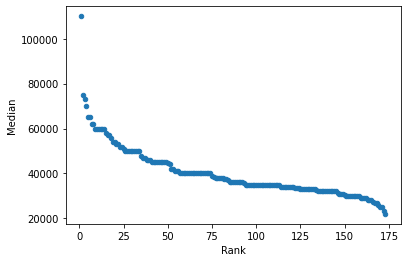

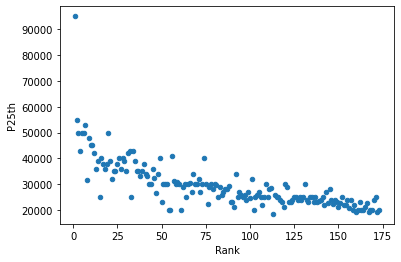

In [ ]:
#df.plot(x="Rank", y=["P25th", "Median", "P75th"], kind='scatter')

df.plot(x="Rank", y="Median", kind='scatter')
df.plot(x="Rank", y="P25th", kind='scatter')
plt.show()

Q:散佈圖與折線圖的差異??

## 3. 長條圖
使用時機:檢視多個變項或多個類別的差異
- 不同職業的平均薪資

x軸:類別；y軸:數值

常會利用顏色區分不同標的

In [ ]:
df.sort_values(by="Median", ascending=False).head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


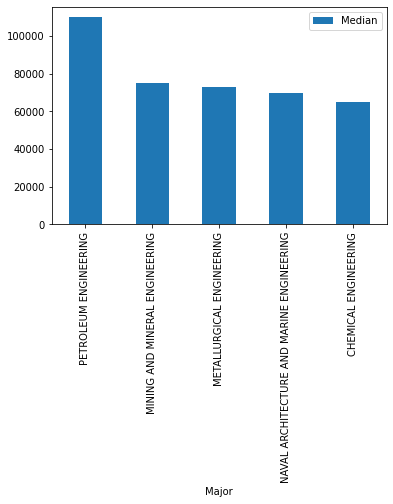

In [ ]:
# 檢視[收入中位數前五名的科系]，在[收入中位數]上的差異

# 將 plot 裡的 kind 參數設為 bar 就能畫出長條圖

top_5 = df.sort_values(by="Median", ascending=False).head()

top_5.plot(x="Major", y="Median", kind="bar", fontsize=10)
plt.show()

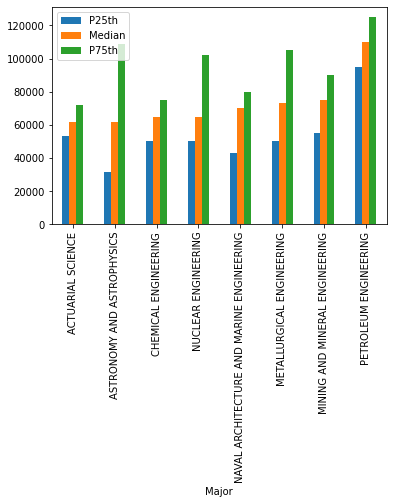

In [ ]:
# 檢視[收入中位數超過6萬的科系]，在[收入]上的差異
top_medians = df[df["Median"] > 60000].sort_values("Median")

top_medians.plot(x="Major", y=["P25th", "Median", "P75th"], kind="bar")
plt.show()

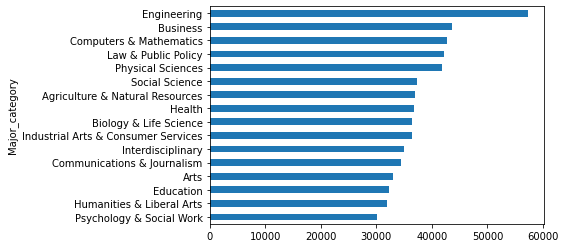

In [ ]:
# 檢視[不同科系類群]在[收入中位數]上的差異

# 將 plot 裡的 kind 參數設為 barh 就能畫出水平長條圖
cat_medians = df.groupby("Major_category")["Median"].mean().sort_values()

cat_medians.plot(kind="barh", fontsize=10)
plt.show()

In [ ]:
df.groupby("Major_category")["Median"].mean().sort_values()

Major_category
Psychology & Social Work               30100.000000
Humanities & Liberal Arts              31913.333333
Education                              32350.000000
Arts                                   33062.500000
Communications & Journalism            34500.000000
Interdisciplinary                      35000.000000
Industrial Arts & Consumer Services    36342.857143
Biology & Life Science                 36421.428571
Health                                 36825.000000
Agriculture & Natural Resources        36900.000000
Social Science                         37344.444444
Physical Sciences                      41890.000000
Law & Public Policy                    42200.000000
Computers & Mathematics                42745.454545
Business                               43538.461538
Engineering                            57382.758621
Name: Median, dtype: float64

## 4. 直方圖
使用時機:檢視數值變項的分佈範圍、集中狀態
- 全台灣的年齡分佈範圍
- 全台灣的月薪分佈範圍

x軸:數值；y軸:數值(次數)

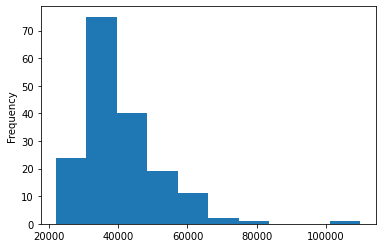

In [ ]:
# 檢視全部科系的[收入中位數]分布範圍、集中程度

# 將 plot 裡的 kind 參數設為 hist 就能畫出直方圖

#median_column = df["Median"]
#median_column.plot(kind="hist")

df["Median"].plot(kind="hist")

plt.show()

Q:直方圖與長條圖的差異???

## 5. 圓餅圖
使用時機:檢視類別變項的標籤數、與分佈比例
- 公司所有部門的名稱與各部門人數

無x軸y軸之分，要有標籤與數值

與長條圖相似，但傳遞訊息不同
- 圓餅圖意在顯示比例
- 長條圖意在比較差異

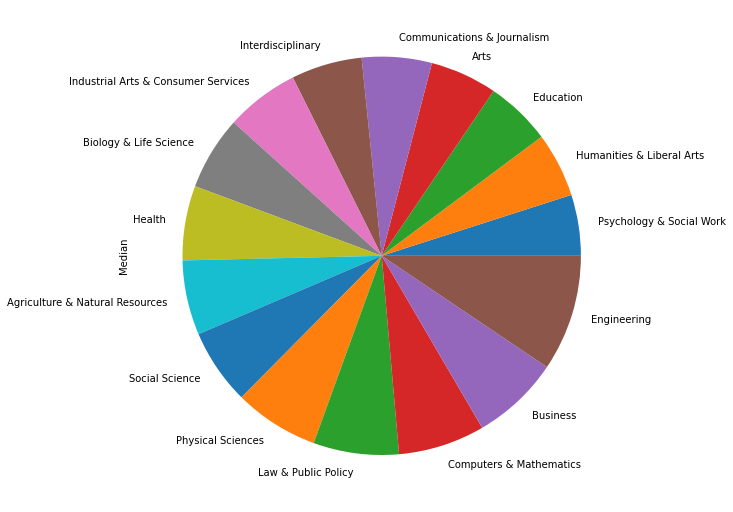

In [ ]:
# 檢視[不同科系類群]在[收入中位數]上的差異

# 將 plot 裡的 kind 參數設為 pie 就能畫出圓餅圖
cat_medians.plot(kind="pie", fontsize=10, figsize=(10,10))
plt.tight_layout()
plt.show()

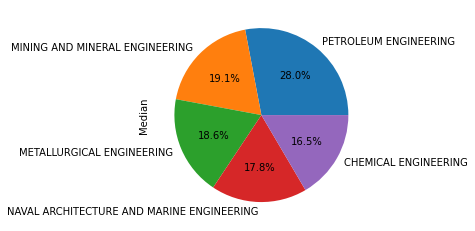

In [ ]:
#檢視[收入中位數前五名的科系]，在[收入中位數]上的差異

top_5 = df.sort_values(by="Median", ascending=False).head()

top_5.plot(y="Median", kind="pie", fontsize=10, labels=top_5['Major'], legend = False, autopct='%2.1f%%')
plt.show()